In [2]:
# Clear all variables
%reset -f
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import os
import time
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")



c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


***Essential Numpy Moves***

**E1:**

Create a 1 000 000‑sample vector of i.i.d. 𝒩(0, 1) numbers. 2. Re‑create it as float32 without an explicit loop.

In [5]:
x64 = np.random.standard_normal((1000000,1)) # produce 1 million "independent and identically distributed" (iid) random numbers.
print(x64[1:5])
x32 = x64.astype(np.float32) # convert to 32 bit float

[[-0.29274736]
 [ 0.74768368]
 [ 0.83232078]
 [ 0.06265928]]



**E2:**

Turn a 100 × 100 matrix into a 10 × 10 × 100 “batch cube” where each frontal slice is 10 × 10

In [6]:
X = np.random.standard_normal((100,100)) # produce 100 x 100 iid random numbers.
Y = X.reshape(10,10,100)

**E3**

Compute all pairwise dot‑products of 100 random 3‑D vectors with and without a for‑loop.

In [9]:
N = 100
V = np.zeros((N,N), int)

# first with a for loop
v1 = np.random.randint(1,10,(N,3))
start_time_1 = time.time()
for i in range(N):
    for j in range(N):
        V[i,j] = np.dot(v1[i],v1[j].T)
end_time_1 = time.time()


# now with einsum
start_time_2 = time.time()
d2 = np.einsum('ik,jk->ij', v1, v1)
end_time_2 = time.time()


execution_time_1 = end_time_1 - start_time_1
execution_time_2 = end_time_2 - start_time_2
ex_diff = execution_time_1 - execution_time_2
print(f"Execution time difference in for loop vs einsum: {ex_diff} seconds")

Execution time difference in for loop vs einsum: 0.039880990982055664 seconds


**E3**

Compute the product of 

1) Two matrices
2) Matrix with a vector
3) Batched matrix multiplication
4) Using broadcastring compute the product of a batch of matrices with a single matrix

In [11]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
v = np.array([3, 6])

C = np.einsum('ij,jk->ik', A, B)  # Matrix multiplication using einsum
D = np.matmul(A, B)  # Matrix multiplication using matmul
print(C==D) # Check if the results are the same

X1 = np.einsum('ij,j -> i', A, v) 
X2 = np.matmul(A, v)
X1-X2 # Check if the results are the same

D = np.array([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])
E = np.array([[[9, 8], [7, 6]], [[5, 4], [3, 2]]])

X3 = np.matmul(D, E)
print(X3)

F = np.array([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])
G = np.array([[1, 2], [3, 4]])

result = np.matmul(F, G)
print(result)


[[ True  True]
 [ True  True]]
[[[23 20]
  [55 48]]

 [[43 32]
  [59 44]]]
[[[ 7 10]
  [15 22]]

 [[23 34]
  [31 46]]]


**E3**

Generate 100 paths of geometric Brownian motion, each with 1000 timesteps, return a vector of pathwise means in one line.

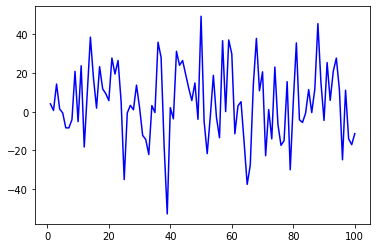

In [44]:
y = np.random.standard_normal((100, 1000)) # produce 100 x 1000 iid random numbers (increments)
cum_sum = np.cumsum(y, axis=1) # cumulative sum along the second axis
mean_cum_sum = np.mean(cum_sum, axis=1) # mean of the cumulative sum along the second axis

# in  one line
y = np.random.default_rng(22).standard_normal((100,1000)).cumsum(1).mean(1)
x = range(1,101)
plt.plot(x, y, label='Mean of Cumulative Sum', color='blue')

In [79]:
from scipy.stats import norm
def N(d1):
    return norm.cdf(d1)
def Nprime(d1):
    return norm.pdf(d1)

def analytic_greek(S, K, T, sigma, r=0.0, q=0.0):
    exp_q = np.exp(-q * T)
    Expr = np.exp(-r * T)
    d1 = (np.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    C = S*exp_q*N(d1)-K*Expr*N(d2)
    P = K*Expr*N(-d1)-S*exp_q*N(-d2)
    # compute Greeks
    delta = exp_q*N(d1)
    gamma = exp_q*Nprime(d1) / (S * sigma * np.sqrt(T))
    theta = -0.5 * S * exp_q * Nprime(d1) * sigma / np.sqrt(T) - r * K * Expr * N(d2) + q * S * exp_q * N(d1)
    vega = S * exp_q * Nprime(d1) * np.sqrt(T)
    rho = K * Expr * N(d2) * T
    psi = -S * exp_q * N(d1) * T
    return d1, d2, delta, gamma, theta, vega, rho, psi

In [80]:
[d1, d2, delta, gamma, theta, vega, rho, psi] = analytic_greek(100, 100, 0.5, 0.2, 0.02, 0.0)
print(f"d1: {d1}, d2: {d2}, delta: {delta}, gamma: {gamma}, theta: {theta}, vega: {vega}, rho: {rho}, psi: {psi}")

d1: 0.1414213562373095, d2: -2.7755575615628914e-17, delta: 0.5562314580091424, gamma: 0.027928790169723425, theta: -6.575807867693853, vega: 27.928790169723428, rho: 24.7512458437292, psi: -27.811572900457122


[0.5615575442733106, 0.5664455887239763, 0.5709861715062394, 0.5752422538174826, 0.579259709439103, 0.583073193692467, 0.5867096492803215, 0.5901905174622761, 0.5935331950581405, 0.59675202974633, 0.5998590208353192, 0.6028643255275108, 0.6057766328677645, 0.6086034453479743, 0.6113512946052392, 0.6140259091448449, 0.6166323465230795, 0.6191750987856598, 0.6216581774946629, 0.6240851829770754, 0.6264593612339945, 0.6287836510970874, 0.6310607236013988, 0.6332930150902056, 0.6354827552305979, 0.637631990865069, 0.6397426064318724, 0.6418163415391711, 0.6438548061636211, 0.6458594938546987, 0.6478317932557741, 0.6497729981971665, 0.6516843165718845, 0.6535668781689604, 0.6554217416103242, 0.6572499005136068, 0.6590522889839803, 0.6608297865222886, 0.6625832224236179, 0.6643133797295637, 0.6660209987883802, 0.6677067804695762, 0.6693713890731313, 0.6710154549680898, 0.6726395769907115, 0.6742443246284561, 0.6758302400127477, 0.6773978397406168, 0.6789476165428612, 0.6804800408142626, 0.68

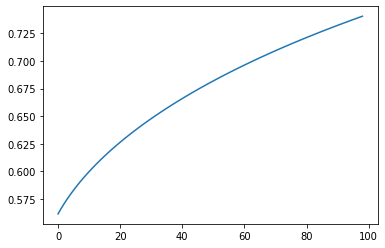

In [86]:
X = []
for i in range(1,100):
    [d1, d2, delta, gamma, theta, vega, rho, psi] = analytic_greek(100, 100, 0.5+i/10, 0.2, 0.02, 0.0)
    X.append(delta)
print(X)
plt.plot(X)
